In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.manifold import TSNE
import pickle

In [3]:
## loading movies data
movies = pd.read_csv("/Users/snehaagarwal/Desktop/UML/Project/Dataset/ml-25m/movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [5]:
ratings = pd.read_csv("/Users/snehaagarwal/Desktop/UML/Project/Dataset/ml-25m/ratings.csv")


In [6]:
ratings = ratings.drop('timestamp',axis=1)
ratings

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
25000090,162541,50872,4.5
25000091,162541,55768,2.5
25000092,162541,56176,2.0
25000093,162541,58559,4.0


In [7]:
rati = ratings.groupby('userId').count()
rati.columns=['movieId','ratingcount']
rati = rati.drop('movieId',axis=1)


In [8]:
rati = rati[rati['ratingcount']>500]
rati

,ratingcount
userId,
3,656
12,736
72,813
80,517
120,640
...,...
162484,855
162495,1265
162508,1288


In [9]:
movi = ratings.groupby('movieId').count()
movi.columns=['userId','ratingcount']
movi = movi.drop('userId',axis=1)
movi.sort_values('ratingcount',ascending=False)

,ratingcount
movieId,
356,81491
318,81482
296,79672
593,74127
2571,72674
...,...
167308,1
167326,1
167336,1


In [10]:
movi = movi[movi['ratingcount']>100]
movi

,ratingcount
movieId,
1,57309
2,24228
3,11804
4,2523
5,11714
...,...
203519,157
204352,185
204542,190


In [11]:
ratings_sampled = ratings.loc[ratings['movieId'].isin(movi.index) & ratings['userId'].isin(rati.index)]

In [12]:
ratings_sampled

,userId,movieId,rating
254,3,1,4.0
255,3,29,4.5
256,3,32,4.5
257,3,50,5.0
258,3,111,4.0
...,...,...,...
24996936,162519,4748,2.0
24996937,162519,4789,1.0
24996938,162519,4855,5.0
24996939,162519,4857,5.0


In [44]:
ratings_sampled_pivot = ratings_sampled.pivot_table(index='userId',columns='movieId',values="rating")
ratings_sampled_pivot

movieId,1,2,3,4,5,6,7,8,9,10,...,202103,202393,202429,202439,203222,203519,204352,204542,204698,205383
userId,,,,,,,,,,,,,,,,,,,,,
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,4.0,2.0,2.0,NaN,NaN,NaN,3.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,2.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162484,3.5,3.0,NaN,3.0,2.0,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162495,3.0,3.0,3.5,NaN,2.0,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162508,4.5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings_sampled_pivot[ratings_sampled_pivot['userId'].isin[]]

In [14]:
R_demeaned = ratings_sampled_pivot.sub(ratings_sampled_pivot.mean(axis=1),axis=0)
R_demeaned

userId,3,12,72,80,120,166,171,175,181,187,...,162386,162387,162394,162445,162481,162484,162495,162508,162516,162519
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.171887,0.171887,NaN,NaN,1.171887,0.171887,0.671887,0.171887,NaN,-0.328113,...,NaN,0.171887,1.171887,-0.328113,NaN,-0.328113,-0.828113,0.671887,0.671887,1.171887
2,NaN,-1.059255,-1.059255,-2.059255,NaN,NaN,0.940745,-1.059255,NaN,0.440745,...,1.940745,-0.059255,0.440745,NaN,0.940745,-0.059255,-0.059255,NaN,-0.559255,-1.059255
3,NaN,-0.848990,NaN,NaN,NaN,1.151010,NaN,NaN,NaN,0.151010,...,NaN,0.151010,NaN,NaN,NaN,NaN,0.651010,NaN,-2.348990,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.452229,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.452229,NaN,NaN,-0.547771,NaN
5,NaN,NaN,NaN,NaN,NaN,1.291332,NaN,NaN,NaN,NaN,...,NaN,-0.708668,-0.208668,NaN,NaN,-0.708668,-0.708668,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.108108,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
R_demeaned1 = R_demeaned.fillna(0)
R_demeaned1

userId,3,12,72,80,120,166,171,175,181,187,...,162386,162387,162394,162445,162481,162484,162495,162508,162516,162519
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.171887,0.171887,0.000000,0.000000,1.171887,0.171887,0.671887,0.171887,0.000000,-0.328113,...,0.000000,0.171887,1.171887,-0.328113,0.000000,-0.328113,-0.828113,0.671887,0.671887,1.171887
2,0.000000,-1.059255,-1.059255,-2.059255,0.000000,0.000000,0.940745,-1.059255,0.000000,0.440745,...,1.940745,-0.059255,0.440745,0.000000,0.940745,-0.059255,-0.059255,0.000000,-0.559255,-1.059255
3,0.000000,-0.848990,0.000000,0.000000,0.000000,1.151010,0.000000,0.000000,0.000000,0.151010,...,0.000000,0.151010,0.000000,0.000000,0.000000,0.000000,0.651010,0.000000,-2.348990,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.452229,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.452229,0.000000,0.000000,-0.547771,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,1.291332,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.708668,-0.208668,0.000000,0.000000,-0.708668,-0.708668,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
204352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
204542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.108108,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
R_demeaned1_scaled = min_max_scaler.fit_transform(R_demeaned1)
R_demeaned1_scaled

array([[0.56184996, 0.61243255, 0.52906587, ..., 0.78627476, 0.75319744,
        0.77340779],
       [0.50904457, 0.31523646, 0.33401909, ..., 0.6690065 , 0.49780467,
        0.34697181],
       [0.50904457, 0.36599419, 0.52906587, ..., 0.6690065 , 0.12653528,
        0.54942626],
       ...,
       [0.50904457, 0.57093934, 0.52906587, ..., 0.6690065 , 0.61381874,
        0.54942626],
       [0.50904457, 0.57093934, 0.52906587, ..., 0.6690065 , 0.61381874,
        0.54942626],
       [0.50904457, 0.57093934, 0.52906587, ..., 0.6690065 , 0.61381874,
        0.54942626]])

In [17]:
df_R_demeaned1_scaled = pd.DataFrame(R_demeaned1_scaled)
df_R_demeaned1_scaled

,0,1,2,3,4,5,6,7,8,9,...,9653,9654,9655,9656,9657,9658,9659,9660,9661,9662
0,0.561850,0.612433,0.529066,0.588108,0.702645,0.590656,0.699297,0.579276,0.770668,0.366725,...,0.488559,0.550083,0.811767,0.450322,0.547802,0.566265,0.445378,0.786275,0.753197,0.773408
1,0.509045,0.315236,0.334019,0.194599,0.479231,0.560757,0.767946,0.349436,0.770668,0.562338,...,0.847366,0.501315,0.679054,0.551719,0.746898,0.631077,0.584503,0.669006,0.497805,0.346972
2,0.509045,0.365994,0.529066,0.588108,0.479231,0.760972,0.527739,0.547187,0.770668,0.488624,...,0.488559,0.545678,0.599051,0.551719,0.547802,0.645361,0.713026,0.669006,0.126535,0.549426
3,0.509045,0.570939,0.529066,0.588108,0.479231,0.560757,0.527739,0.631613,0.770668,0.450204,...,0.488559,0.513817,0.599051,0.551719,0.547802,0.754377,0.595226,0.669006,0.500187,0.549426
4,0.509045,0.570939,0.529066,0.588108,0.479231,0.785380,0.527739,0.547187,0.770668,0.450204,...,0.488559,0.364297,0.561175,0.551719,0.547802,0.474527,0.466992,0.669006,0.613819,0.549426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10286,0.509045,0.570939,0.529066,0.588108,0.479231,0.560757,0.527739,0.547187,0.770668,0.450204,...,0.488559,0.513817,0.599051,0.551719,0.547802,0.645361,0.595226,0.669006,0.613819,0.549426
10287,0.509045,0.570939,0.529066,0.588108,0.479231,0.560757,0.527739,0.547187,0.770668,0.450204,...,0.488559,0.513817,0.599051,0.551719,0.547802,0.645361,0.595226,0.669006,0.613819,0.549426
10288,0.509045,0.570939,0.529066,0.588108,0.479231,0.560757,0.527739,0.547187,0.307645,0.450204,...,0.488559,0.513817,0.599051,0.551719,0.547802,0.645361,0.595226,0.669006,0.613819,0.549426
10289,0.509045,0.570939,0.529066,0.588108,0.479231,0.560757,0.527739,0.547187,0.448053,0.450204,...,0.488559,0.513817,0.599051,0.551719,0.547802,0.645361,0.595226,0.669006,0.613819,0.549426


In [24]:
pca_df_R_demeaned1_scaled = PCA().fit(df_R_demeaned1_scaled)

In [25]:
#np.set_printoptions(precision=2)
pca_variance = pca_df_R_demeaned1_scaled.explained_variance_ratio_

In [27]:
pca_variance = list(pca_variance)
cum_pca_variance=0
for i in range(len(pca_variance)):
    cum_pca_variance = cum_pca_variance+pca_variance[i]
    if(i%50==0):
        print("i:",i)
        print("cumulative variance:",cum_pca_variance)

i: 0
cumulative variance: 0.0489626147424455
i: 50
cumulative variance: 0.21109080025942373
i: 100
cumulative variance: 0.26309359287497214
i: 150
cumulative variance: 0.30353931818865576
i: 200
cumulative variance: 0.33843268077900424
i: 250
cumulative variance: 0.3696678341704407
i: 300
cumulative variance: 0.39822341127709177
i: 350
cumulative variance: 0.42458867274952966
i: 400
cumulative variance: 0.4491422521438116
i: 450
cumulative variance: 0.4721134406600781
i: 500
cumulative variance: 0.49369345007414833
i: 550
cumulative variance: 0.514040904165457
i: 600
cumulative variance: 0.5332646723229603
i: 650
cumulative variance: 0.5514752386271419
i: 700
cumulative variance: 0.5687600875469117
i: 750
cumulative variance: 0.5852031743943296
i: 800
cumulative variance: 0.600861959784454
i: 850
cumulative variance: 0.6157878105175413
i: 900
cumulative variance: 0.630023479767654
i: 950
cumulative variance: 0.6436199508568071
i: 1000
cumulative variance: 0.6566279884793174
i: 1050
cum

In [28]:
pca_R_demeaned1_scaled = PCA(n_components=2000)
pca_R_demeaned1_scaled = pca_R_demeaned1_scaled.fit_transform(df_R_demeaned1_scaled)
pca_R_demeaned1_scaled
pca_R_demeaned1_scaled = pd.DataFrame(pca_R_demeaned1_scaled)
pca_R_demeaned1_scaled

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,6.712083,3.147897,-0.184684,3.981290,4.164112,-0.336731,2.067053,0.037064,0.805140,1.525603,...,0.003807,-0.004216,-0.067917,0.004800,-0.021811,-0.018248,0.028716,0.057455,0.039499,0.010882
1,6.038781,-1.935476,-2.126237,0.530632,0.326311,-0.307465,1.560137,-1.917415,0.498971,1.065339,...,-0.022064,0.042946,-0.006816,-0.006685,0.000069,0.001453,-0.002722,0.018366,0.026215,0.046151
2,1.945643,-0.646976,-2.071195,-0.058113,-0.252051,0.024747,0.829438,-0.309485,-0.700540,-0.618781,...,-0.127734,-0.138529,-0.048140,-0.034663,-0.048170,0.013169,0.043313,0.033235,-0.099957,-0.072495
3,-0.157629,-0.095726,-0.651772,0.385457,-0.326549,0.145264,0.138692,-0.282599,-0.221219,0.047637,...,-0.075530,-0.042314,-0.033861,0.065668,0.097511,-0.124040,-0.021993,-0.098695,0.107179,0.113794
4,2.284403,-0.850880,-2.122544,1.049743,-0.485520,0.193884,1.062326,-0.479140,-0.708101,0.167985,...,-0.023350,-0.081208,-0.044593,-0.138929,0.125444,0.117668,0.094925,0.003921,-0.050120,-0.061461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10286,-0.622817,-0.128648,0.068437,0.024494,0.225377,0.084160,-0.030151,0.108419,-0.020511,0.021994,...,-0.046542,-0.028767,-0.000525,0.037866,-0.006252,0.006791,0.007743,0.034080,-0.004385,-0.003998
10287,-0.678104,-0.047205,0.055098,-0.029718,0.193346,0.166888,0.096786,0.054154,0.045815,0.054647,...,0.004928,-0.000457,-0.024911,0.028480,-0.003679,-0.005366,-0.009221,0.013539,-0.052129,0.015081
10288,-0.550414,-0.087101,0.172559,-0.015702,0.233312,0.114748,0.131840,0.042365,0.009967,0.055264,...,-0.005897,0.013832,-0.006391,-0.005172,0.011787,0.014595,-0.021886,-0.001779,-0.027034,0.018409
10289,-0.513931,-0.048241,0.291633,-0.063998,0.217307,0.211953,0.131212,-0.071515,-0.038157,0.048115,...,-0.043030,0.025803,-0.098327,0.013162,0.007336,0.001080,-0.008718,-0.043915,-0.040476,-0.021990


In [29]:
tSNE_p30_R_demeaned1_scaled = TSNE(n_components=2).fit_transform(pca_R_demeaned1_scaled)

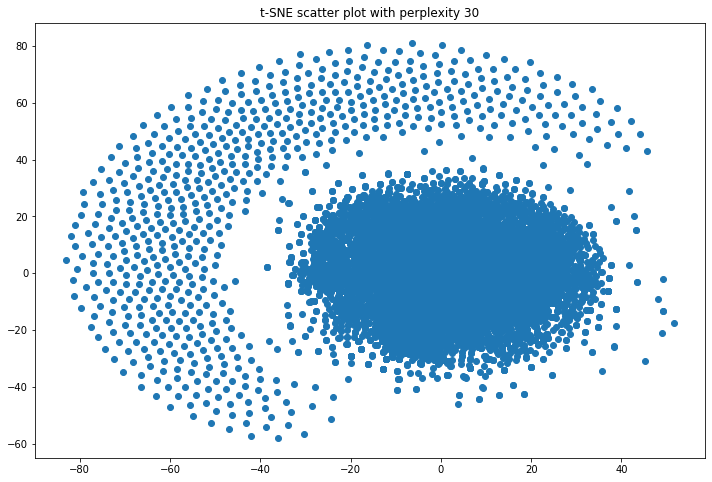

In [30]:
#t-SNE plot for perplexity 30 
plt.figure(figsize = (12,8))
plt.scatter(x=tSNE_p30_R_demeaned1_scaled[:,0],y=tSNE_p30_R_demeaned1_scaled[:,1])
plt.title("t-SNE scatter plot with perplexity 30")
plt.show()

In [18]:
def KMeansclus(n):
    kmeans = KMeans(n_clusters=n, random_state=123).fit(df_R_demeaned1_scaled)
    labels = kmeans.labels_
    #cluster_centers = kmeans.cluster_centers_
    #plt.scatter(df_tSNE_p30_R_demeaned1_scaled.iloc[:,1],-df_tSNE_p30_R_demeaned1_scaled.iloc[:,0],c=labels, cmap="viridis")
    #plt.axis('off')
    #c = cluster_centers[labels][:,2:]
    #plt.figure(figsize = (8,4))
    #plt.imshow(c.reshape(x, y, z)[:,:,0], cmap="viridis")
    #print("For k: ",n)
    #plt.show()
    return(labels)

In [35]:
SH_Kmeans=[]
for n in range(2,15):
    lab_Kmeans = KMeansclus(n)
    SH_Kmeans.append(metrics.silhouette_score(df_R_demeaned1_scaled, lab_Kmeans, metric='euclidean'))
    

In [36]:
SH_Kmeans

[0.4718591913036119,
 0.4453126741055703,
 0.15869021750949416,
 0.43127091624091884,
 0.35635230955782193,
 0.3707876776328443,
 0.36576564584366333,
 0.28780724618278947,
 0.3395713004599383,
 0.32922510727875587,
 0.44489431179756345,
 0.34994588091528916,
 0.3255636868264048]

In [41]:
lab_Kmeans_12 = KMeansclus(12)

In [40]:
SH_Kmeans[10]

0.44489431179756345

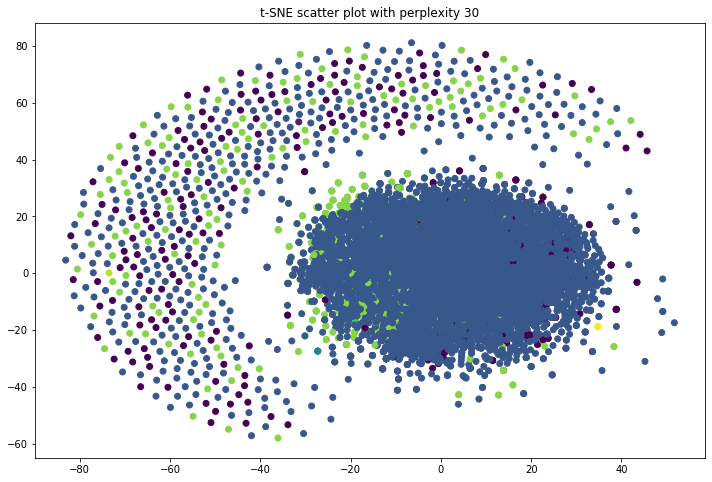

In [42]:
plt.figure(figsize = (12,8))
plt.scatter(x=tSNE_p30_R_demeaned1_scaled[:,0],y=tSNE_p30_R_demeaned1_scaled[:,1],c=lab_Kmeans_12,cmap="viridis")
plt.title("t-SNE scatter plot with perplexity 30")
plt.show()

In [21]:
def GMMclus(n):
    GMM_R = GaussianMixture(n_components =n, random_state=123)
    labels = GMM_R.fit_predict(df_R_demeaned1_scaled)
    #cluster_means_GMM = GMM.means_
    #c = cluster_means_GMM[labels_GMM][:,2:]
    #if fig==1:
        #plt.scatter(df_minmax_bird_.iloc[:,1],-df_minmax_bird_.iloc[:,0],c= GMM_bird_labels, cmap="viridis")
        #plt.axis('off')
    #plt.figure(figsize = (8,4))
    #plt.imshow(c.reshape(x, y, z)[:,:,0], cmap="viridis")
        #print("For K: ",n)
        #plt.show()
    return(labels)

In [22]:
lab_GMM_2 = GMMclus(2)

In [23]:
metrics.silhouette_score(df_R_demeaned1_scaled, lab_GMM_2)

0.2793373740073203

In [43]:
lab_GMM_12 = GMMclus(12)